# Decision tree classifier: diabetes prediction

Absolutely minimal MVP (minimum viable product) solution.

## 1. Data acquisition

### 1.1. Load

In [4]:
import pandas as pd

# Load the data from the URL
data_df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

### 1.2. Train-test split

In [5]:
from sklearn.model_selection import train_test_split

# Separate features from labels
labels=data_df['Outcome']
features=data_df.drop('Outcome', axis=1)

# Split the data into training and testing features and labels
training_features, testing_features, training_labels, testing_labels=train_test_split(
    features,
    labels,
    test_size=0.2,
    random_state=315
)

## 2. EDA

### 2.1. Features

In [6]:
# Inspect the training features' data types
training_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 765 to 611
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB


<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 765 to 611
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


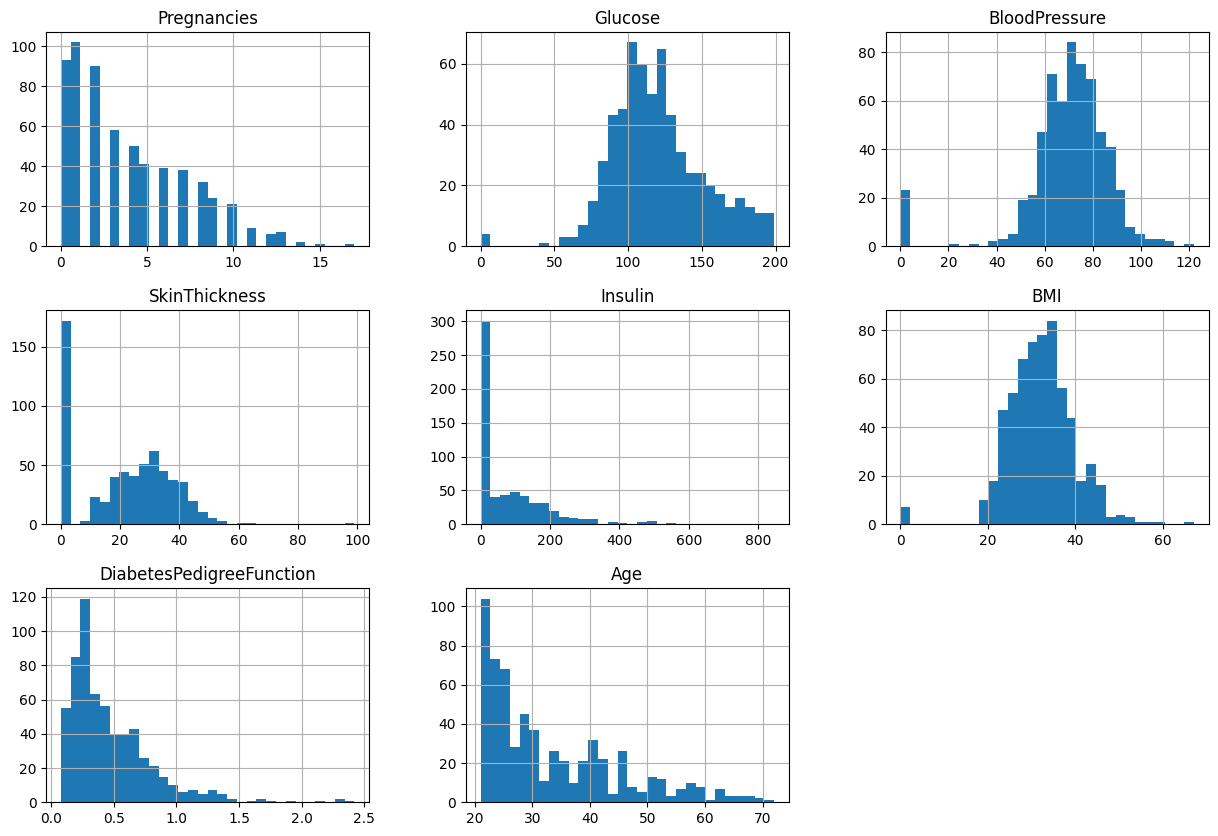

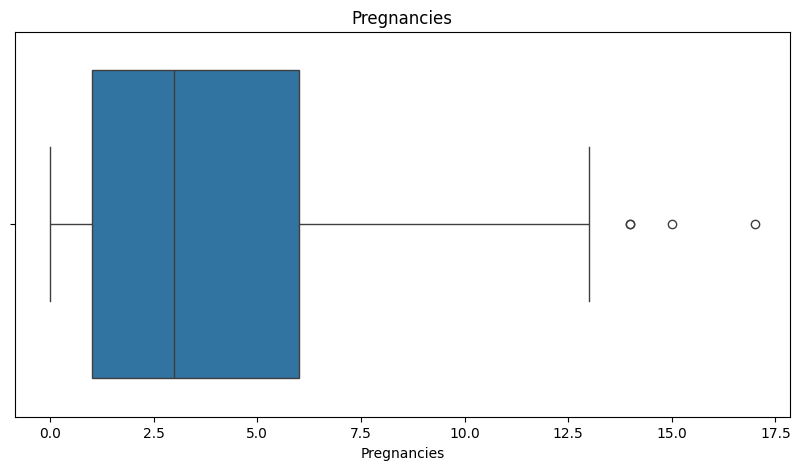

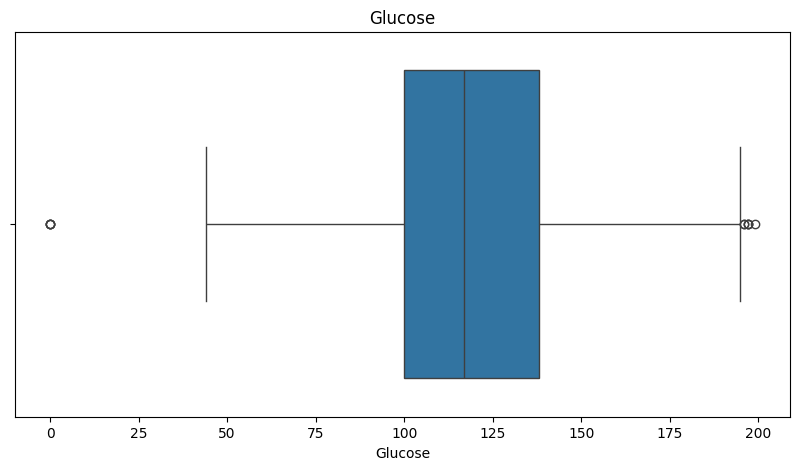

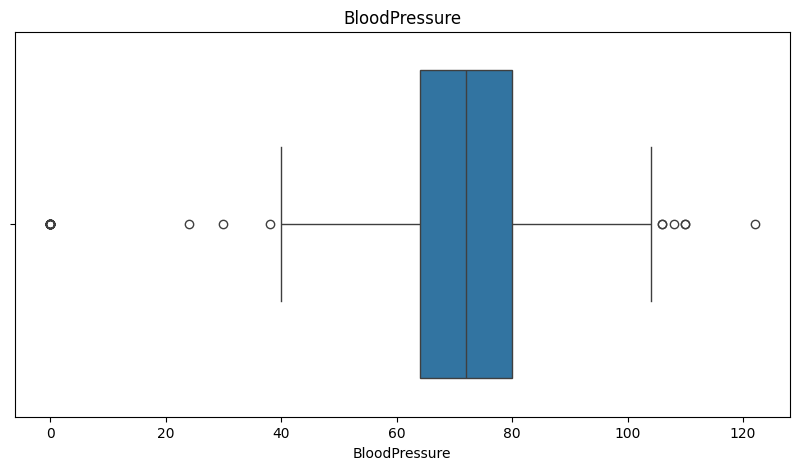

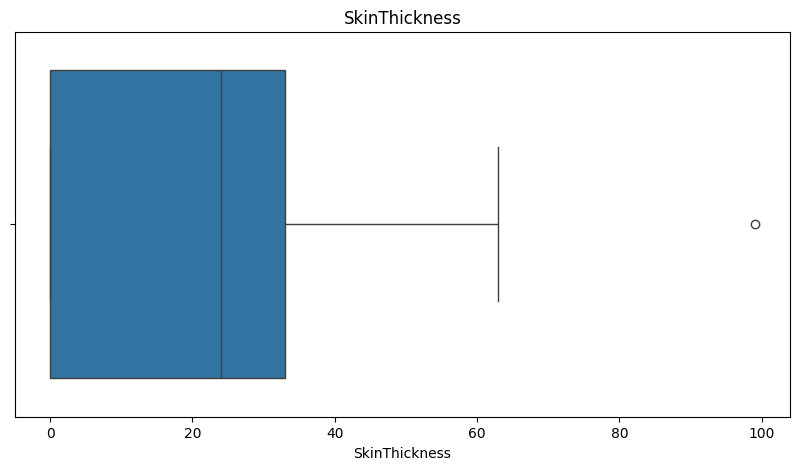

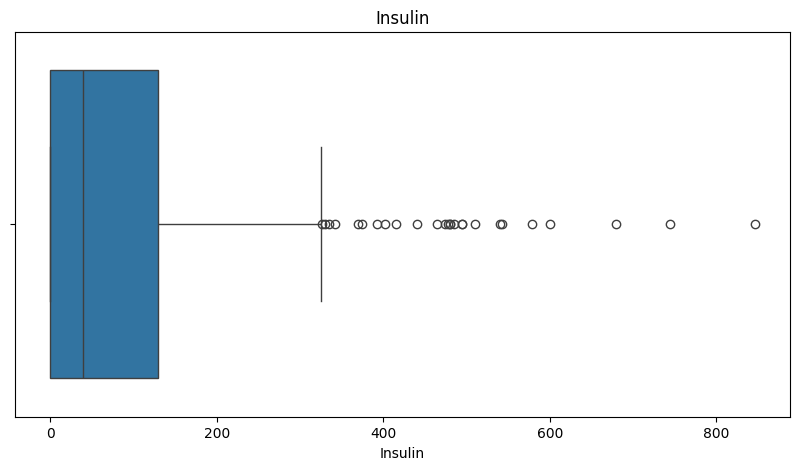

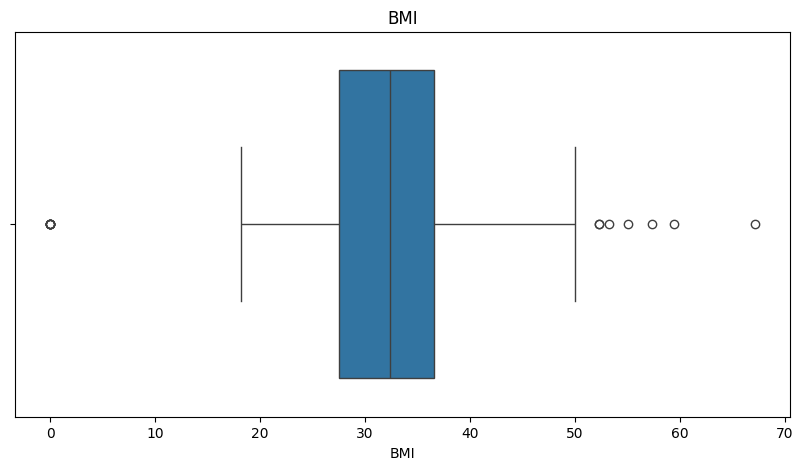

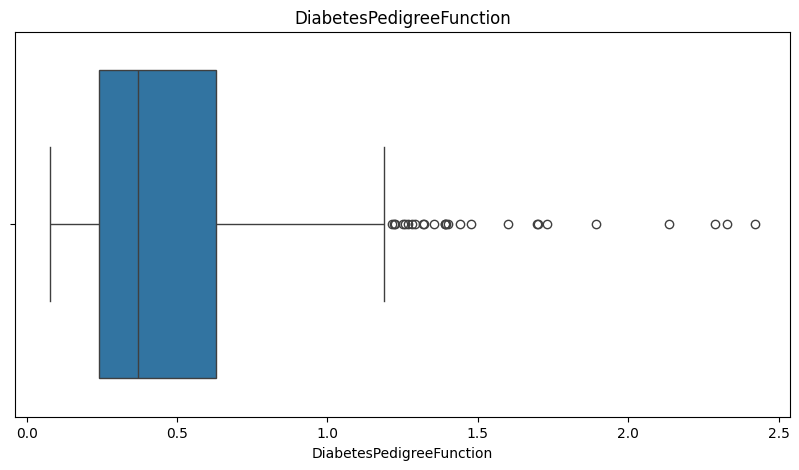

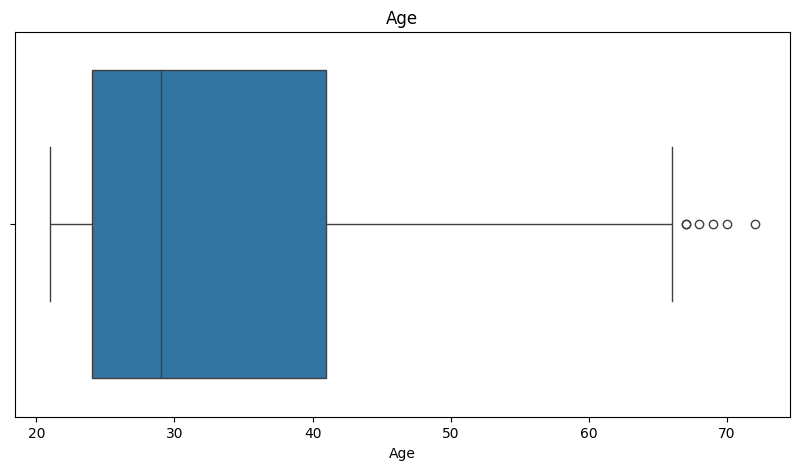

<class 'pandas.core.series.Series'>
Index: 614 entries, 765 to 611
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 9.6 KB


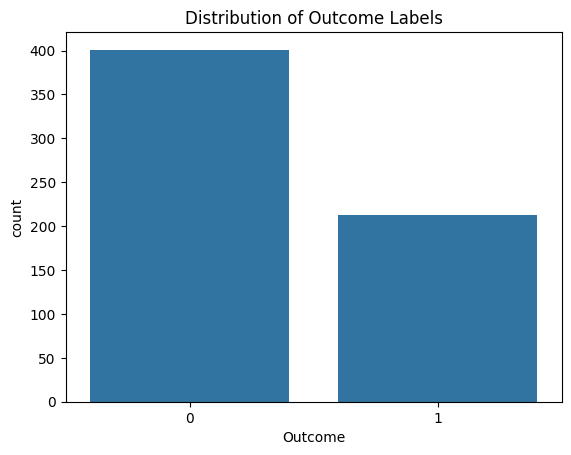

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1. Features
# Inspect the training features' data types
training_features.info()

# Check for missing values
print(data_df.isnull().sum())

# Visualize distributions of features
training_features.hist(bins=30, figsize=(15, 10))
plt.show()

# Boxplots to check for outliers
for col in training_features.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=training_features[col])
    plt.title(col)
    plt.show()

# 2.2. Labels
training_labels.info()

# Distribution of labels
sns.countplot(x=training_labels)
plt.title('Distribution of Outcome Labels')
plt.show()

In [7]:
training_features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.851792,120.605863,69.602606,21.307818,83.459283,32.215961,0.473090,33.245928
std,3.403173,31.483407,18.224136,16.055309,120.021358,7.706636,0.339908,11.742608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.500000,0.239250,24.000000
50%,3.000000,117.000000,72.000000,24.000000,39.000000,32.350000,0.370500,29.000000
75%,6.000000,138.000000,80.000000,33.000000,130.000000,36.575000,0.628500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,72.000000


In [8]:
zero_counts = (data_df == 0).sum()
print(zero_counts[zero_counts > 0])

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64


In [9]:
zero_counts

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
import numpy as np

cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_df[cols_to_replace] = data_df[cols_to_replace].replace(0, np.nan)

data_df[cols_to_replace] = data_df[cols_to_replace].fillna(data_df[cols_to_replace].median())

In [11]:
print(data_df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

All of the features are already numeric - we don't need to do anything for the model to run. Let's check the labels too.

### 2.2. Labels

In [12]:
training_labels.info()

<class 'pandas.core.series.Series'>
Index: 614 entries, 765 to 611
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 9.6 KB


Also already numeric - we can move right to training the model and setting a baseline performance result.

## 3. Training

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and train decision tree classifier
model=DecisionTreeClassifier(random_state=315)
fit_result=model.fit(training_features, training_labels)

In [17]:
from sklearn.linear_model import LogisticRegression

# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=315)
decision_tree_model.fit(training_features, training_labels)

# Logistic Regression Classifier
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(training_features, training_labels)

LogisticRegression(max_iter=1000)

## 4. Evaluation

In [14]:
from sklearn.metrics import accuracy_score

# Make predictions from test set features
predicted_labels=model.predict(testing_features)

# Score predictions from accuracy
percent_accuracy=accuracy_score(testing_labels, predicted_labels) * 100
print(f'Model is {percent_accuracy:.1f}% accurate on the test data')

Model is 74.7% accurate on the test data


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}

# Instantiate GridSearchCV with the corrected parameter grid
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=315), param_grid, cv=5, n_jobs=-1)
grid_search.fit(training_features, training_labels)

# Output best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model found by GridSearchCV
best_tree_model = grid_search.best_estimator_

# Make predictions with the optimized model
best_tree_predictions = best_tree_model.predict(testing_features)

# Evaluate the optimized model
best_tree_accuracy = accuracy_score(testing_labels, best_tree_predictions)
print(f'Optimized Decision Tree Model Accuracy: {best_tree_accuracy:.2f}')

Best Hyperparameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Optimized Decision Tree Model Accuracy: 0.75


Ok, done! Absolutely minimal decision tree classifier using ~10 statements. From here, there is **a lot** we can and should do to improve. But now we can do so incrementally, while maintaining a running state. We can also tell if anything we do 'works' in the performance sense by comparing to our baseline result of ~75% accuracy.